# Titanic Survival Prediction

## Data Loading and Exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"tested.csv")

# Display the first few rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
cols=list(data.columns)
print(cols)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


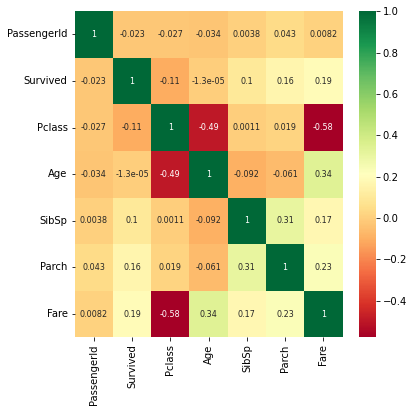

In [7]:
#get correlations of each features in dataset  (checking the correlation[relation] of the feautures with the label(output[0:1]))
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))
#plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn", annot_kws={"fontsize": 8});

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Data Preprocessing

In [12]:
# Handle missing values

# Fill missing Age and Fare with their respective medians
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Drop the Cabin column
data.drop('Cabin', axis=1, inplace=True)

In [13]:
# Encoding categorical variables

# Binary encode the Sex column
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

# One-hot encode the Embarked column
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Drop columns that are not directly useful for prediction
data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# Display the transformed dataframe
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,34.5,0,0,7.8292,1,0
1,1,3,0,47.0,1,0,7.0000,0,1
2,0,2,1,62.0,0,0,9.6875,1,0
3,0,3,1,27.0,0,0,8.6625,0,1
4,1,3,0,22.0,1,1,12.2875,0,1


## Model Training and Evaluation

In [14]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#let's see the values that sruvived are 0
count0=data['Survived'][data.Survived==0].count()
count0

266

In [18]:
X_train.shape

(334, 8)

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree Classifier object
dpth=4
model= DecisionTreeClassifier(criterion='entropy', max_depth=dpth)

In [21]:
#Train Classifier
model=model.fit(X_train,y_train)

In [22]:
#Predict the response for each test datasets
y_pred = model.predict(X_test)

In [23]:
# Comparing outcomes of Original dataset and the outcome(prediction) of the model
C= pd.DataFrame({'Original': y_test,'Predicted': y_pred})
C

,Original,Predicted
321,0,0
324,1,1
388,0,0
56,0,0
153,1,1
...,...,...
57,0,0
126,0,0
24,1,1
17,0,0


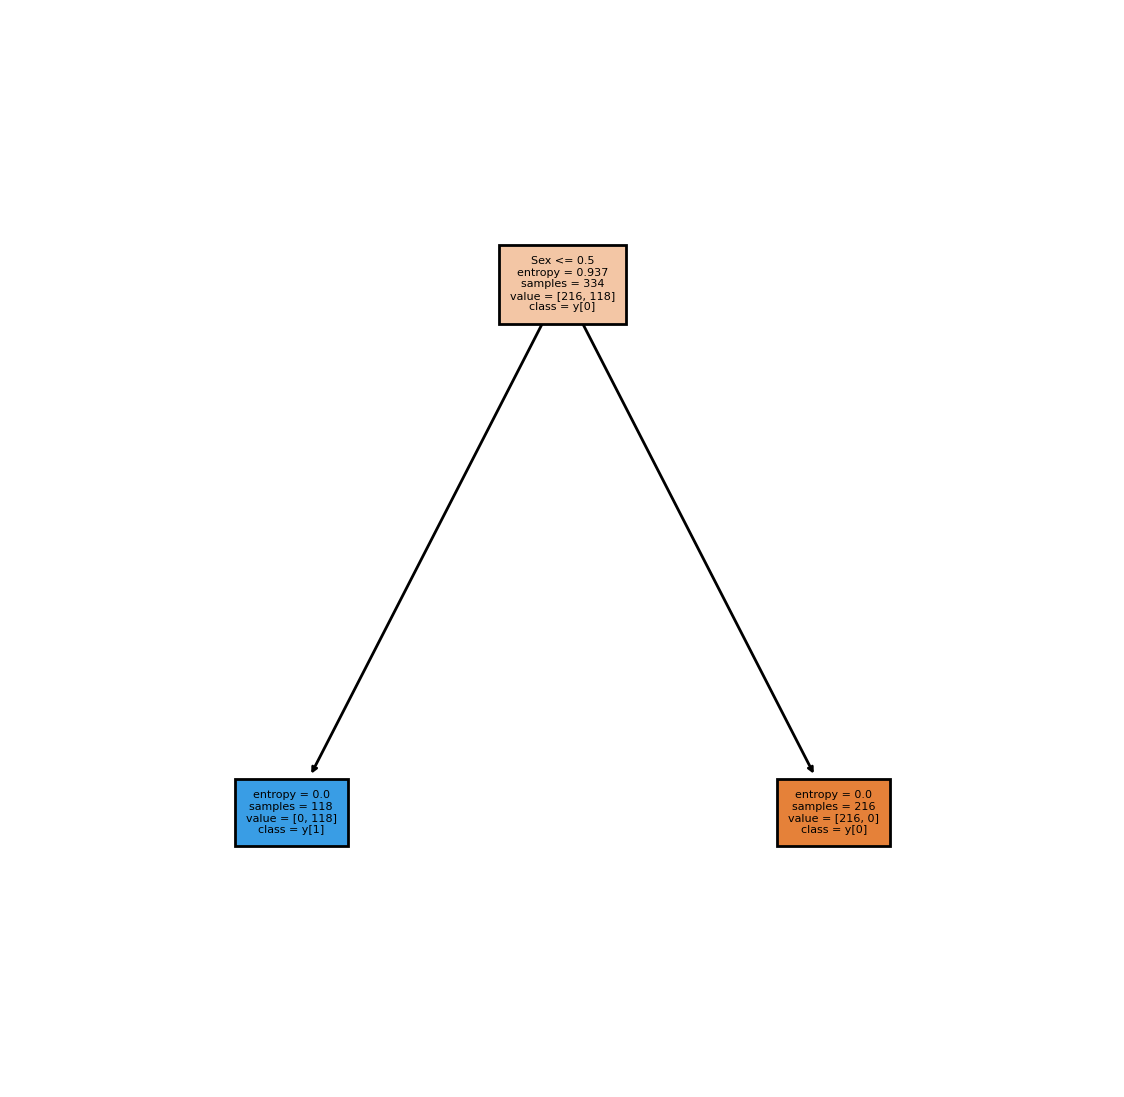

In [24]:
from sklearn import tree

# Plot the decision tree with customizations
plt.figure(figsize=(7, 7), dpi=200)
plt.title("Decision Tree Visualization")
tree.plot_tree(model, filled=True, feature_names=X_train.columns, class_names=True, fontsize=4, max_depth=dpth)

plt.show()

In [25]:
# get total number of 0 in the training dataset
Trcount0 = y_train[y_train==0].count()

# get total number of 1 in the training dataset
Trcount1 = y_train[y_train==1].count()

labels = ['0', '1']   #
counts = [Trcount0, Trcount1]  # YE TRAINING DATA K VARIABLE HAI FOR 0 AND 1

print("Training Dataset")
print("0's:", Trcount0)
print("1's:", Trcount1)

Training Dataset
0's: 216
1's: 118


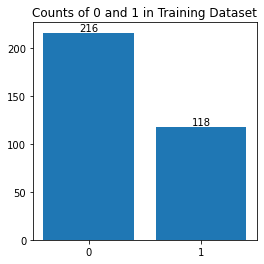

In [26]:
plt.figure(figsize=(4,4))
plt.title('Counts of 0 and 1 in Training Dataset')
plt.bar(labels, counts)

# Add annotations to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
   
plt.show()

In [27]:
# calculate accuracy
from sklearn import metrics

result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

def plt1():
    import seaborn as sns; sns.set()
    plt.figure(figsize=(4,4))
    c_mtrx = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx, annot=True, fmt = '.3g')


Confusion Matrix:
[[50  0]
 [ 0 34]]


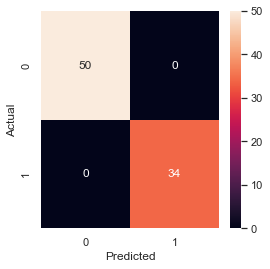

In [28]:
plt1()

In [29]:
#[row, column]
#(Actual, Predict)
TP = result[1, 1]      
TN = result[0, 0]
FP = result[0, 1]
FN = result[1, 0]

In [30]:
def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))
    print('###########################################')


EvClsMdl(result)

Metrics computed from a confusion matrix
Accuracy:	 1.0
Sensitivity:	 1.0
Specificity:	 1.0
Precision:	 1.0
Classification Eerror: 0.0
False_Positive_Rate: 0.0
###########################################


In [ ]:
#so our data model is perfect as accuracy is 100% so our model is ready to predict whether or not passenger survived